In [17]:
import numpy as np
import random as rm
import timeit as tt
import statistics as st
import jax.numpy as jnp
from jax import grad
import matplotlib.pyplot as plt
import pandas as pd
import sympy as smp

**Q1.How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

No of multiplications= $n*m*k$\
(Each row of k elements is multipled with each column of k elements.So for a single element in matrix we need k multiplications. hence for whole matrix we need this much multiplications)\
No of addition operations=$n*m*(k-1)$\
(For each element in the matrix of order (n,m) we need to add (k-1) terms)

**Q2.Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [18]:
n=10
k=5
m=3
#matrix definition
a = []
for i in range(n):
  col = []
  for j in range(k):
    col.append(rm.randint(1,9))
  a.append(col)

b = []
for i in range(k):
  col = []
  for j in range(m):
    col.append(rm.randint(1,9))
  b.append(col)

# matrix to store the result 
c = []
for i in range(n):
  col = []
  for j in range(m):
    col.append(0)
  c.append(col)


# list method
def f1(a,b,c):
  for i in range (len(a)):
    for j in range (len(b[0])):
      for p in range (len(a[0])):
        c[i][j] += a[i][p]*b[p][j]
  return c

# numpy method
def f2(a,b):
  return np.dot(a,b)

print("a = ", a)
print("b =", b)
print("result1 = ", f1(a,b,c))
print("result2 = ", f2(a,b))

time1=[]
time2=[]


print("a = ", a)
print("b =", b)
print("result1 = ", f1(a,b,c))
print("result2 = ", f2(a,b))

for count in range(1000):
  
  for i in range(n):
    for j in range(m):
      c[i][j] = 0

  t0 = tt.default_timer()
  result1 = f1(a,b,c)
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time1.append(time)


  t0 = tt.default_timer() 
  result2 = f2(a,b)
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time2.append(time)

# average times
ti1 = sum(time1)/len(time1)
ti2 = sum(time2)/len(time2)
ti1 = round(ti1,3)
ti2 = round(ti2,3)

# sd's
sd1 = st.pstdev(time1)
sd2 = st.pstdev(time2)
sd1 = round(sd1,3)
sd2 = round(sd2,3)

print("list method: ", ti1,"+/-", sd1, " micro sec")
print("numpy method: ", ti2,"+/-", sd2, " micro sec")

a =  [[5, 1, 2, 2, 2], [7, 2, 5, 2, 3], [1, 2, 9, 4, 3], [5, 5, 8, 6, 6], [5, 3, 8, 3, 8], [1, 7, 2, 5, 1], [2, 1, 8, 2, 8], [7, 2, 9, 6, 6], [6, 2, 1, 4, 2], [7, 8, 2, 9, 7]]
b = [[1, 2, 8], [4, 9, 5], [6, 9, 3], [4, 5, 8], [3, 3, 8]]
result1 =  [[35, 53, 83], [62, 96, 121], [88, 130, 101], [115, 175, 185], [101, 148, 167], [64, 111, 97], [86, 119, 125], [111, 161, 189], [42, 65, 109], [108, 170, 230]]
result2 =  [[ 35  53  83]
 [ 62  96 121]
 [ 88 130 101]
 [115 175 185]
 [101 148 167]
 [ 64 111  97]
 [ 86 119 125]
 [111 161 189]
 [ 42  65 109]
 [108 170 230]]
a =  [[5, 1, 2, 2, 2], [7, 2, 5, 2, 3], [1, 2, 9, 4, 3], [5, 5, 8, 6, 6], [5, 3, 8, 3, 8], [1, 7, 2, 5, 1], [2, 1, 8, 2, 8], [7, 2, 9, 6, 6], [6, 2, 1, 4, 2], [7, 8, 2, 9, 7]]
b = [[1, 2, 8], [4, 9, 5], [6, 9, 3], [4, 5, 8], [3, 3, 8]]
result1 =  [[70, 106, 166], [124, 192, 242], [176, 260, 202], [230, 350, 370], [202, 296, 334], [128, 222, 194], [172, 238, 250], [222, 322, 378], [84, 130, 218], [216, 340, 460]]
result2 =  [[ 3

From this we can infer that the numpy method is faster since it uses parallel procesing for computation

**Q3.Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

The method mentioned above results in a time complexity of $O(n^{\lceil \frac{n}{2} \rceil})$\
We may also do this by using a sorting algorithm 

In [ ]:
# assume odd length array
num = []
nu = 501
for h in range(nu):
  num.append(rm.randint(1,101))
copy = num.copy()
iter = nu//2

# ceil(n/2) passes
def f3(num):
  for r in range(iter):
    max = num[0]
    for t in range(1,len(num)):
      if num[t] > max:
        max = num[t]
    num.remove(max)
  max = num[0]
  for t in range(1,len(num)):
    if num[t] > max:
      max = num[t]
  return max

# sorting method
def f4():
  num.sort()
  return num[iter]

# numpy.median method
def f5():
  return np.median(num)
  
print(f3(copy))
print(f4())
print(int(f5()))

time3 = []
time4 = []
time5 = []
# time calculation
for count in range(1000):
  copy = num.copy()

  t0 = tt.default_timer()
  r3 = f3(copy)
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time3.append(time)


  t0 = tt.default_timer() 
  r4 = f4()
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time4.append(time)

  t0 = tt.default_timer() 
  r5 = f5()
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time5.append(time)

# average times
ti3 = sum(time3)/len(time3)
ti4 = sum(time4)/len(time4)
ti5 = sum(time5)/len(time5)
ti3 = round(ti3,3)
ti4 = round(ti4,3)
ti5 = round(ti5,3)
# sd's
sd3 = st.pstdev(time3)
sd4 = st.pstdev(time4)
sd5 = st.pstdev(time5)
sd3 = round(sd3,3)
sd4 = round(sd4,3)
sd5 = round(sd5,3)

print("n//2 pass method: ", ti3,"+/-", sd3, " micro sec")
print("sorting method: ", ti4,"+/-", sd4, " micro sec")
print("numpy library method: ", ti5,"+/-", sd5, " micro sec")

**Q4.What is the gradient of the following function with respect to x and y?**\
        $$x^2y + y^3\sin(x)$$



The gradient of the above function is as follows\
wrt x $$2xy + y^3 \cos(x)$$


wrt y $$x^2 + 3y^2 \sin(x)$$


**Q5.Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [27]:
def f(x,y):
    return x*x*y+y*y*y*jnp.sin(x)

def f_x(x,y):
    return 2*x*y+y**3*jnp.cos(x)

def f_y(x,y):
    return x**2+3*y*y*jnp.sin(x)

grd_f_x=grad(f,argnums=0)
grd_f_y=grad(f,argnums=1)

print("Answers")
for i in range(10):
     x = round(rm.uniform(0.0,10.0),2)
     y = round(rm.uniform(0.0,10.0),2)

     print("wrt x JAX answer=",float(grd_f_x(x,y)),"Hardcode answer=",f_x(x,y))
     print("wrt y JAX answer=",float(grd_f_y(x,y)),"Hardcode answer=",f_y(x,y))

Answers
wrt x JAX answer= -289.862060546875 Hardcode answer= -289.86206
wrt y JAX answer= -71.79649353027344 Hardcode answer= -71.79649
wrt x JAX answer= 112.52822875976562 Hardcode answer= 112.52823
wrt y JAX answer= 113.73882293701172 Hardcode answer= 113.738815
wrt x JAX answer= 31.98661231994629 Hardcode answer= 31.986614
wrt y JAX answer= 34.35466766357422 Hardcode answer= 34.35467
wrt x JAX answer= 13.943552017211914 Hardcode answer= 13.943551
wrt y JAX answer= 63.52732849121094 Hardcode answer= 63.52733
wrt x JAX answer= 18.514280319213867 Hardcode answer= 18.514278
wrt y JAX answer= 32.558555603027344 Hardcode answer= 32.55855
wrt x JAX answer= -162.5840606689453 Hardcode answer= -162.58406
wrt y JAX answer= 177.7018280029297 Hardcode answer= 177.70183
wrt x JAX answer= 20.17704200744629 Hardcode answer= 20.17704
wrt y JAX answer= 0.2220482975244522 Hardcode answer= 0.2220483
wrt x JAX answer= 191.55758666992188 Hardcode answer= 191.5576
wrt y JAX answer= 136.05552673339844 Har

**Q6.Use sympy to confirm that you obtain the same gradient analytically.**

In [29]:
x, y = smp.symbols('x y')

# Define the function
f = x**2 * y + y**3 * smp.sin(x)

# Calculate partial derivatives
df_dx = smp.diff(f, x)
df_dy = smp.diff(f, y)

# Display the results
print("Partial derivative with respect to x:", df_dx)
print("Partial derivative with respect to y:", df_dy)

Partial derivative with respect to x: 2*x*y + y**3*cos(x)
Partial derivative with respect to y: x**2 + 3*y**2*sin(x)


**Q7.Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.**

In [ ]:
college = {}
# 2024
college[2024] = {
    'Branch 1': {},
    'Branch 2': {
        'Roll Number 3': {
            'Name': 'P',
            'Marks': {'Maths': 80, 'English': 70, 'Science': 90}
        }
    }
}
# 2025
college[2025] = {
    'Branch 1': {},
    'Branch 2': {},
    'Branch 3': {}
}
print(college[2024])


**Q8.Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [ ]:
class Student:
    def __init__(self, name, roll_number, marks):
        self.name = name
        self.roll_number = roll_number
        self.marks = []
        self.marks=marks

class Branch:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

**Q9.Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5**

$y=x$

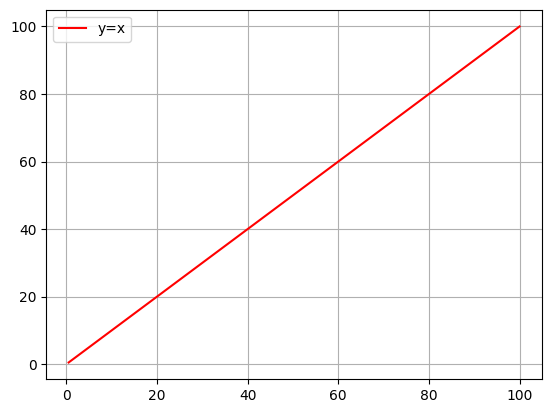

In [30]:
x = np.linspace(0.5,100,200)
y1 = x
plt.plot(x, y1, '-r', label='y=x')
plt.legend(loc='upper left')
plt.grid()
plt.show()

$y = x^{2}$

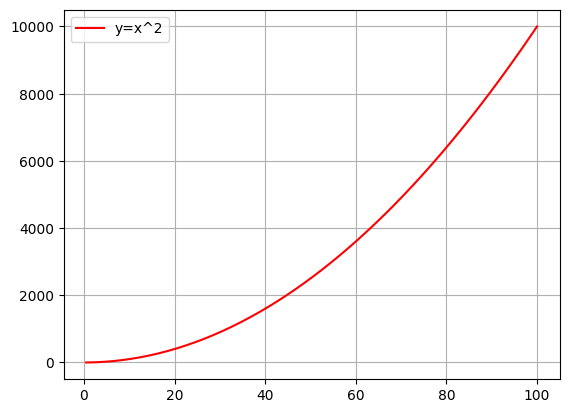

In [31]:
y2 = x*x
plt.plot(x, y2, '-r', label='y=x^2')
plt.legend(loc='upper left')
plt.grid()
plt.show()

$y=x^3/100$

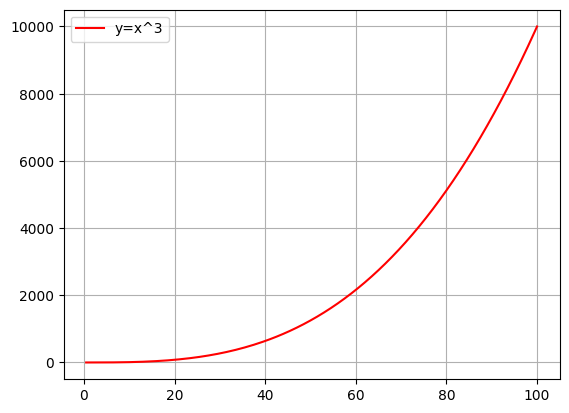

In [33]:
y3 = x*x*x/100
plt.plot(x, y3, '-r', label='y=x^3')
plt.legend(loc='upper left')
plt.grid()
plt.show()

$y=sin(x)$

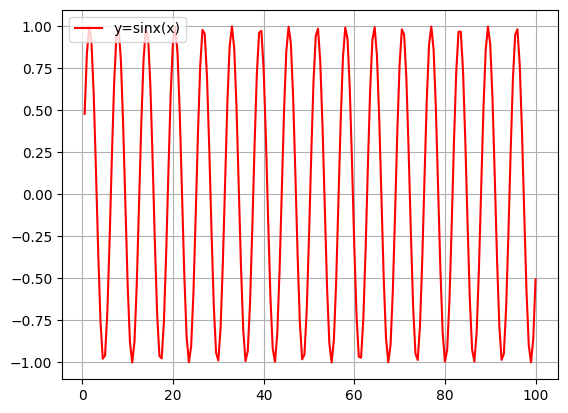

In [34]:
y4 =np.sin(x) 
plt.plot(x, y4, '-r', label='y=sin(x)')
plt.legend(loc='upper left')
plt.grid()
plt.show()

$y=sin(x)/x$

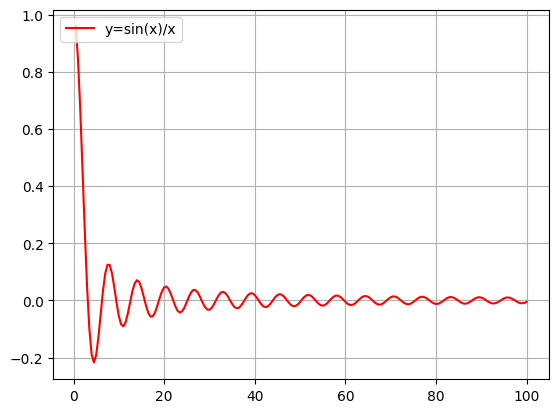

In [36]:
y5 =np.sin(x)/x 
plt.plot(x, y5, '-r', label='y=sin(x)/x')
plt.legend(loc='upper left')
plt.grid()
plt.show()

$y=log(x)$

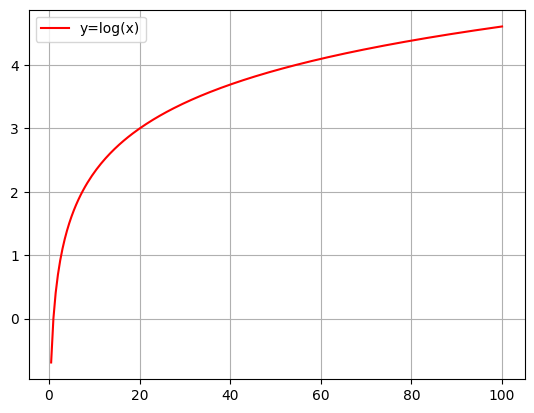

In [37]:
y6 =np.log(x)
plt.plot(x, y6, '-r', label='y=log(x)')
plt.legend(loc='upper left')
plt.grid()
plt.show()

$y=e^x$

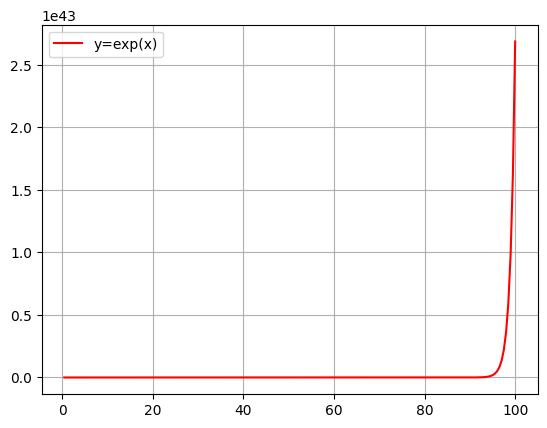

In [38]:
y7 =np.exp(x)
plt.plot(x, y7, '-r', label='y=exp(x)')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**Q10.Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [39]:
# Generate a matrix of size 20x5 with random numbers drawn uniformly from the range 1 to 2
np.random.seed(42)  # for reproducibility
matrix_data = np.random.uniform(1, 2, size=(20, 5))

# Create a DataFrame with the generated matrix
df = pd.DataFrame(matrix_data, columns=['a', 'b', 'c', 'd', 'e'])

# Find the column with the highest standard deviation
max_std_column = df.std().idxmax()

# Find the row with the lowest mean
min_mean_row = df.mean(axis=1).idxmin()

# Print the DataFrame
print("DataFrame:")
print(df)

# Print results
print("\nColumn with the highest standard deviation:", max_std_column)
print("Row with the lowest mean:", min_mean_row)


DataFrame:
           a         b         c         d         e
0   1.374540  1.950714  1.731994  1.598658  1.156019
1   1.155995  1.058084  1.866176  1.601115  1.708073
2   1.020584  1.969910  1.832443  1.212339  1.181825
3   1.183405  1.304242  1.524756  1.431945  1.291229
4   1.611853  1.139494  1.292145  1.366362  1.456070
5   1.785176  1.199674  1.514234  1.592415  1.046450
6   1.607545  1.170524  1.065052  1.948886  1.965632
7   1.808397  1.304614  1.097672  1.684233  1.440152
8   1.122038  1.495177  1.034389  1.909320  1.258780
9   1.662522  1.311711  1.520068  1.546710  1.184854
10  1.969585  1.775133  1.939499  1.894827  1.597900
11  1.921874  1.088493  1.195983  1.045227  1.325330
12  1.388677  1.271349  1.828738  1.356753  1.280935
13  1.542696  1.140924  1.802197  1.074551  1.986887
14  1.772245  1.198716  1.005522  1.815461  1.706857
15  1.729007  1.771270  1.074045  1.358466  1.115869
16  1.863103  1.623298  1.330898  1.063558  1.310982
17  1.325183  1.729606  1.637557  1

**Q11.Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [40]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Create a new column "g" with values "LT8" if "f" is less than 8, and "GT8" otherwise
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Find the number of rows where the value in the column "g" is "LT8"
lt8_count = df[df['g'] == 'LT8'].shape[0]

# Find the standard deviation of the column "f" for rows where the value in the column "g" is "LT8" and "GT8" respectively
std_lt8 = df[df['g'] == 'LT8']['f'].std()
std_gt8 = df[df['g'] == 'GT8']['f'].std()

# Print the DataFrame and results
print("DataFrame:")
print(df)

print("\nNumber of rows where the value in the column 'g' is 'LT8':", lt8_count)
print("Standard deviation of 'f' for rows where 'g' is 'LT8':", std_lt8)
print("Standard deviation of 'f' for rows where 'g' is 'GT8':", std_gt8)


DataFrame:
           a         b         c         d         e         f    g
0   1.374540  1.950714  1.731994  1.598658  1.156019  7.811925  LT8
1   1.155995  1.058084  1.866176  1.601115  1.708073  7.389442  LT8
2   1.020584  1.969910  1.832443  1.212339  1.181825  7.217101  LT8
3   1.183405  1.304242  1.524756  1.431945  1.291229  6.735577  LT8
4   1.611853  1.139494  1.292145  1.366362  1.456070  6.865923  LT8
5   1.785176  1.199674  1.514234  1.592415  1.046450  7.137949  LT8
6   1.607545  1.170524  1.065052  1.948886  1.965632  7.757638  LT8
7   1.808397  1.304614  1.097672  1.684233  1.440152  7.335069  LT8
8   1.122038  1.495177  1.034389  1.909320  1.258780  6.819704  LT8
9   1.662522  1.311711  1.520068  1.546710  1.184854  7.225866  LT8
10  1.969585  1.775133  1.939499  1.894827  1.597900  9.176944  GT8
11  1.921874  1.088493  1.195983  1.045227  1.325330  6.576907  LT8
12  1.388677  1.271349  1.828738  1.356753  1.280935  7.126452  LT8
13  1.542696  1.140924  1.802197  1.0

**Q12.Write a small piece of code to explain broadcasting in numpy**

In [41]:
# Create a 2x3 array
arr_a = np.array([[1, 2, 3], [4, 5, 6]])

# Add a scalar to the entire array using broadcasting
scalar_value = 10
result = arr_a + scalar_value

print("Original Array:")
print(arr_a)

print("\nArray after broadcasting:")
print(result)

Original Array:
[[1 2 3]
 [4 5 6]]

Array after broadcasting:
[[11 12 13]
 [14 15 16]]


here via broadcasting the scalar number is scaled to match the dimentions of the main array and the operations excecuted

**Q13.Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [54]:
sz=10
array=10*np.random.rand(sz)
array=np.array(array)
def minfinder(arr):
    mn=arr[0]
    idx=0
    for i in range(1,len(arr)):
        if arr[i]<mn:
            mn=arr[i]
            idx=i
    return idx
print(array)
print(minfinder(array))
print(np.argmin(array))


[6.77564362 0.16587829 5.12093058 2.26495775 6.4517279  1.74366429
 6.90937738 3.86735346 9.36729989 1.37520944]
1
1
